## Hospital Stay Prediction

Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Create a machine learning model to predict the length of stay (in days) of a patient entering the Hospital, given various factors about their stay.


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
pd.set_option('display.max_columns',None) 
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
df=pd.read_csv('HealthCareAnalytics.csv')
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


### Basic Checks

In [3]:
df.shape

(318438, 18)

In [4]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
df.describe(include='O')

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [7]:
print('Duplicated Values: ',df.duplicated().sum())

Duplicated Values:  0


### Missing Values

In [8]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
# Pecentage of Missing Values for Each Column : 
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0] # list having columns with missing value
print('The Features that have missing values are as follows: \n',features_with_na)
print('-'*125)
for feature in features_with_na:
    print('Percentage of missing values in {} Feature is {} %'.format(feature, np.round(df[feature].isnull().mean()*100, 2)))

The Features that have missing values are as follows: 
 ['Bed_Grade', 'City_Code_Patient']
-----------------------------------------------------------------------------------------------------------------------------
Percentage of missing values in Bed_Grade Feature is 0.04 %
Percentage of missing values in City_Code_Patient Feature is 1.42 %


### Target Variable

In [10]:
df.Stay.value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

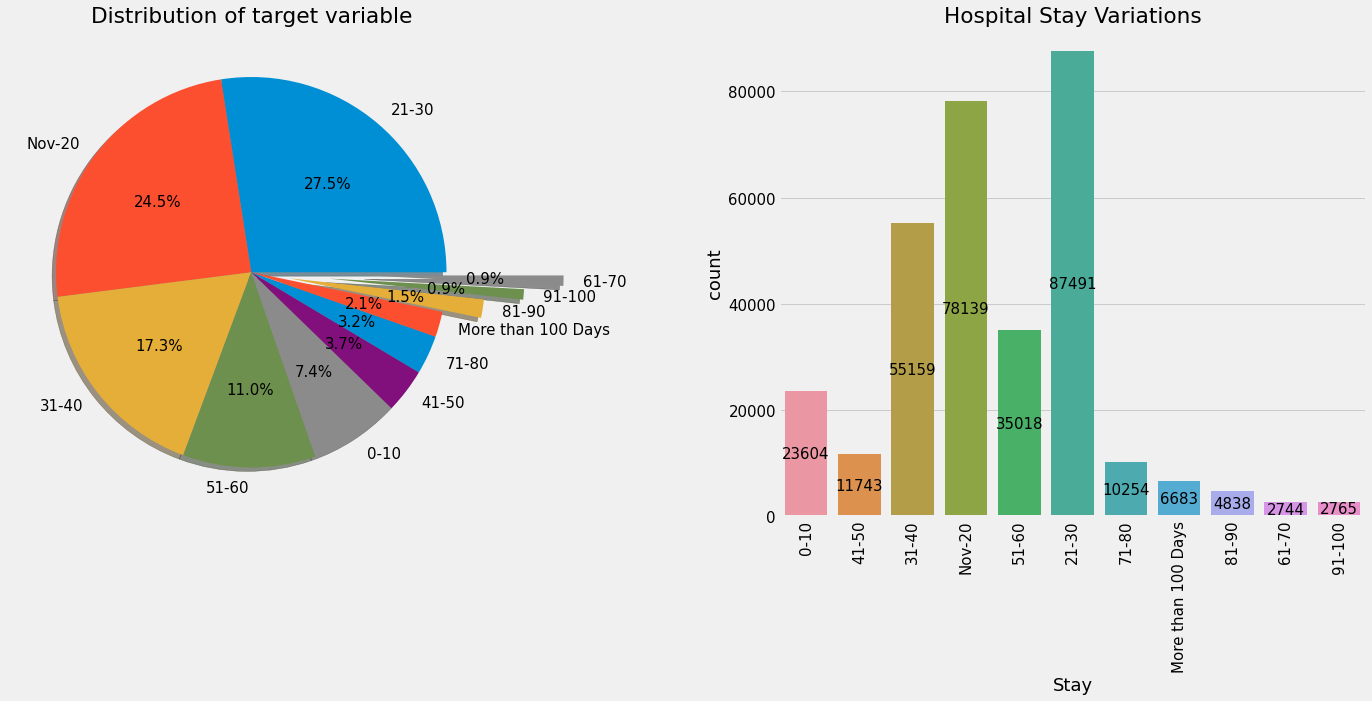

In [11]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df.Stay.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],explode=[0,0,0,0,0,0,0,0,0.2,0.4,0.6],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')

sns.countplot(x='Stay',data=df,ax=ax[1])
annotations = ax[1].bar_label(ax[1].containers[0], fmt='%g',label_type='center')
ax[1].set_title('Hospital Stay Variations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It is an imbalanced type problem. There are too many target classes. We will reduce the number of classes in the target variable to simplify the problem.

In [12]:
# Replacing Target labels 
df["Stay"] = df.Stay.replace({"0-10" : 0, "Nov-20" : 0, "21-30" : 0, # Inside First month, also 'Nov-20' --> '11-20' 
                              "31-40" : 1, "41-50" : 1, "51-60" : 1, # 2 months
                              "61-70" : 2, "71-80" : 2, "81-90" : 2, # 3 months
                              "91-100" : 3 ,"More than 100 Days":3 # More than 3 months
                             }) 

In [13]:
df.Stay.value_counts()

0    189234
1    101920
2     17836
3      9448
Name: Stay, dtype: int64

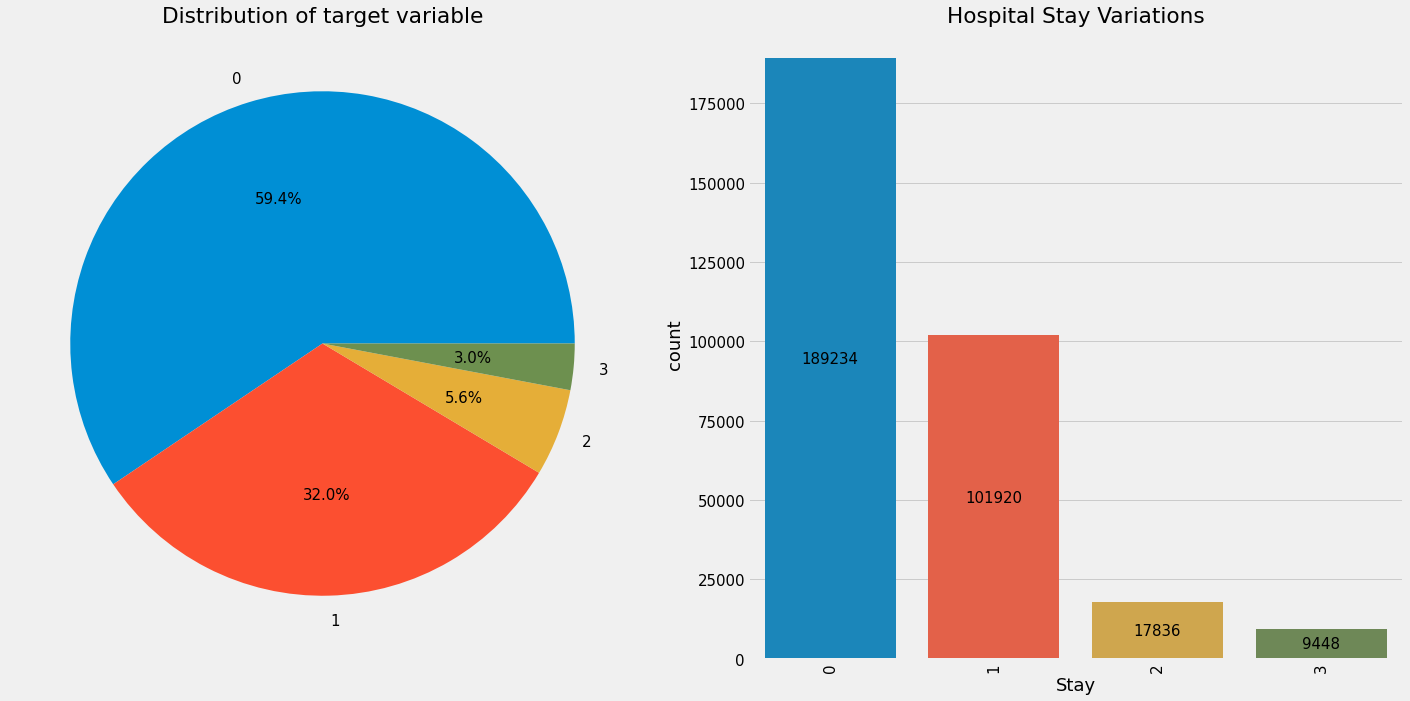

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df.Stay.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')
sns.countplot(x='Stay',data=df,ax=ax[1])
annotations = ax[1].bar_label(ax[1].containers[0], fmt='%g',label_type='center')
ax[1].set_title('Hospital Stay Variations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

| Clearly There is higher percentage of people who stay for less than a month.

| Surprising there are a lot of people who stay between the 1-2 month range.

| Since there is imbalance it may affect model performance.

### Age

In [15]:
df.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
Nov-20    16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [16]:
df["Age"] = df.Age.replace({"Nov-20" : "11-20"})

In [17]:
df.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

### Discrete Features

<Figure size 1440x720 with 0 Axes>

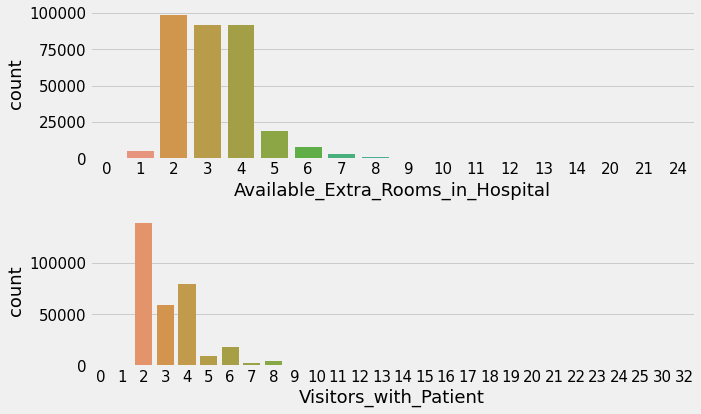

In [18]:
#Univariate Analysis
plt.figure(figsize=(20,10))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Available_Extra_Rooms_in_Hospital', data = df, ax=ax[0])
sns.countplot(x = 'Visitors_with_Patient', data = df, ax=ax[1])
plt.tight_layout()

Most of the Hospitals had only 2-4 Available extra rooms.

Most of the times the number of vistors with patient were only 2 persons.

<Figure size 1440x720 with 0 Axes>

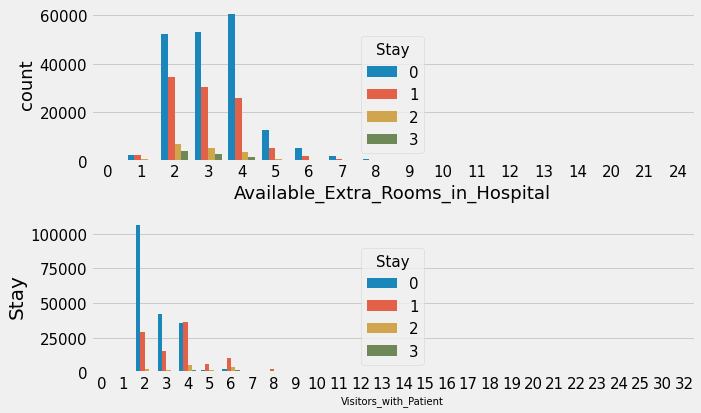

In [19]:
# Bivariate Analysis : 
plt.figure(figsize=(20,10))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Available_Extra_Rooms_in_Hospital', data = df, hue = df.Stay, ax=ax[0])
plt.xlabel('Available_Extra_Rooms_in_Hospital',fontsize=10)
plt.ylabel('Stay',fontsize=10)

sns.countplot(x = 'Visitors_with_Patient', data = df, hue = df.Stay, ax=ax[1])
plt.xlabel('Visitors_with_Patient',fontsize=10)
plt.ylabel('Stay',fontsize=20)

plt.tight_layout()

Stay was predominantly within 1 month irrespective of how many extra rooms were there or how many visited along with patient expect for vistors with patient is 4 where it shows the patient stays more than a month.

### Continous Features

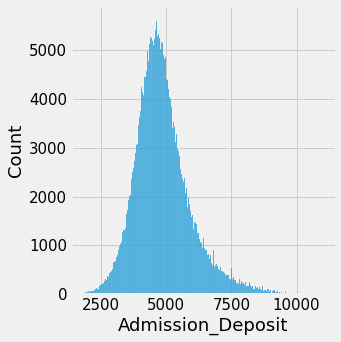

In [20]:
# Univariate Analysis
sns.displot(df.Admission_Deposit)

Most of the initial amount deposit was around 4000-5000 Rs.

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

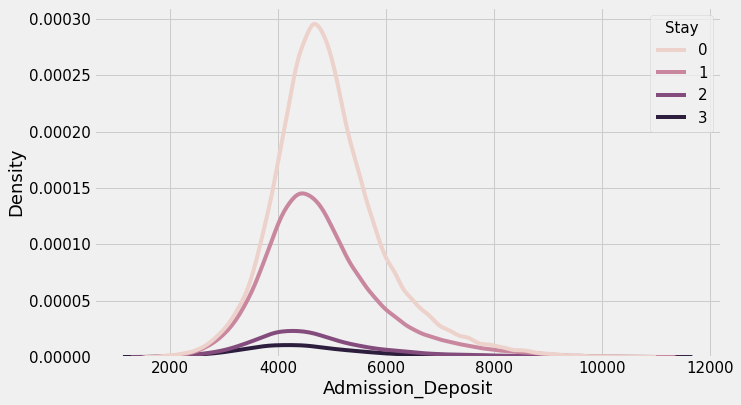

In [21]:
# Bivariate Analysis
sns.kdeplot(df.Admission_Deposit, hue = df.Stay)

### Categorical Feature

'Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type_of_Admission',
 'Severity_of_Illness',
 'Age']

<Figure size 1440x2160 with 0 Axes>

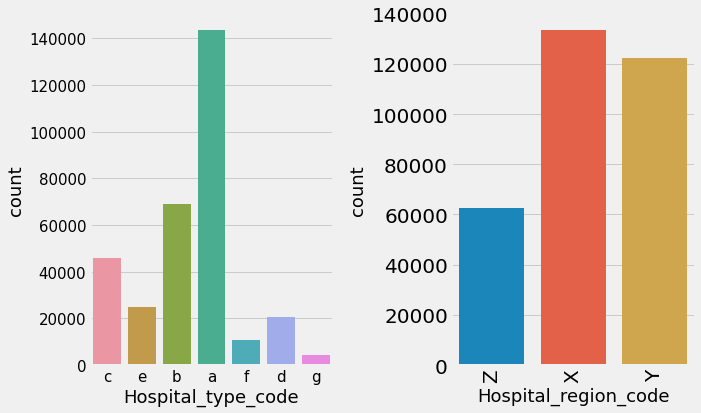

In [22]:
#Univariate Analysis
plt.figure(figsize=(20,30))
fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Hospital_type_code', data = df, ax=ax[0])
sns.countplot(x = 'Hospital_region_code', data = df, ax=ax[1])
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.tight_layout()

<Figure size 1440x2160 with 0 Axes>

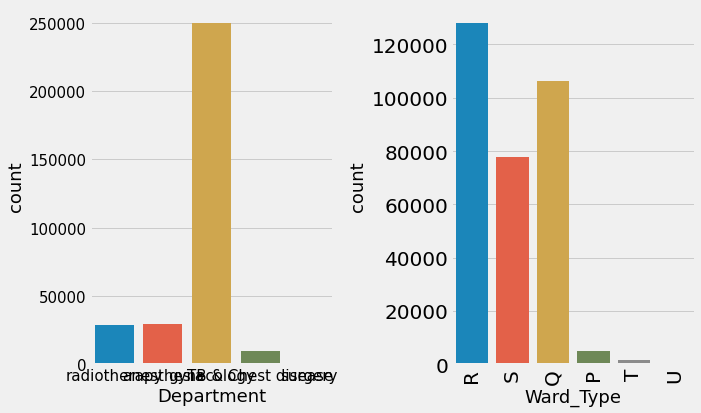

In [23]:
plt.figure(figsize=(20,30))
fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Department', data = df, ax=ax[0])
sns.countplot(x = 'Ward_Type', data = df, ax=ax[1])
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.tight_layout()

<Figure size 1440x2160 with 0 Axes>

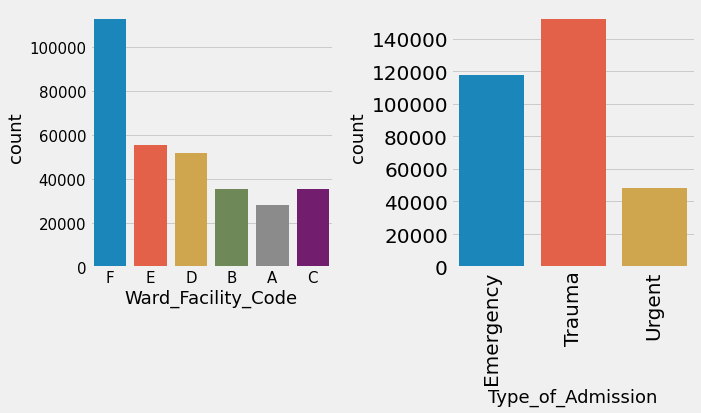

In [24]:
plt.figure(figsize=(20,30))
fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Ward_Facility_Code', data = df, ax=ax[0])
sns.countplot(x = 'Type_of_Admission', data = df, ax=ax[1])

plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.tight_layout()

<Figure size 1440x2160 with 0 Axes>

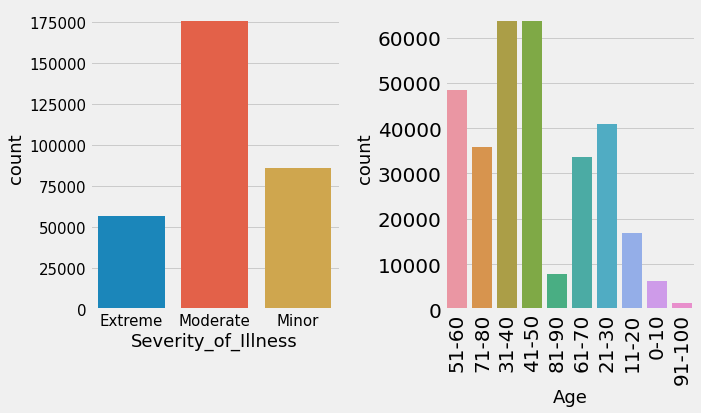

In [25]:
plt.figure(figsize=(20,30))
fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Severity_of_Illness', data = df, ax=ax[0])
sns.countplot(x = 'Age', data = df, ax=ax[1])

plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.tight_layout()

* Hospital_Type a seems to be the most common one with Hospital_Type g being the least common.

* Most of the cases belong to hospitals in region X followed by hospitals in region Y with least numbers from Z region.

* Majority of the cases are in Gynecology department followed by Anesthesia and Radiotherapy departments.

* Surgery has least number of cases.

* Majority of the cases are in R ward type followed by Q and S. U has the least number of cases.

* Most of the cases are admitted in the state of Trauma followed by Emergency followed by Urgent admission type.

* Majority of the people admitted show moderate severity with more than 10% cases showing extreme severity.

* There are good proportion of people showing Minor severity.

* There seems to be almost equal number of patients in the Age Group of 41-50 and 31-40 with majority of them from 41-50 group.

* Very few patients in the age group of 91-100, followed by 0-10 group.

<Figure size 1440x720 with 0 Axes>

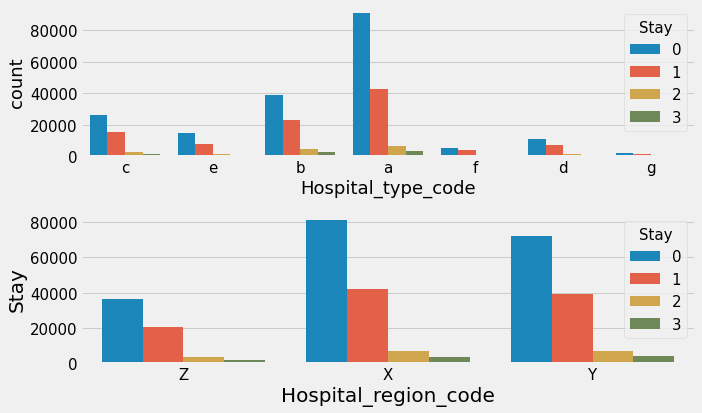

In [26]:
# Bivariate Analysis

plt.figure(figsize=(20,10))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Hospital_type_code', data = df, hue = df.Stay, ax=ax[0])
plt.xlabel('Hospital_type_code',fontsize=20)
plt.ylabel('Stay',fontsize=20)

sns.countplot(x = 'Hospital_region_code', data = df, hue = df.Stay, ax=ax[1])
plt.xlabel('Hospital_region_code',fontsize=20)
plt.ylabel('Stay',fontsize=20)

plt.tight_layout()

<Figure size 1440x720 with 0 Axes>

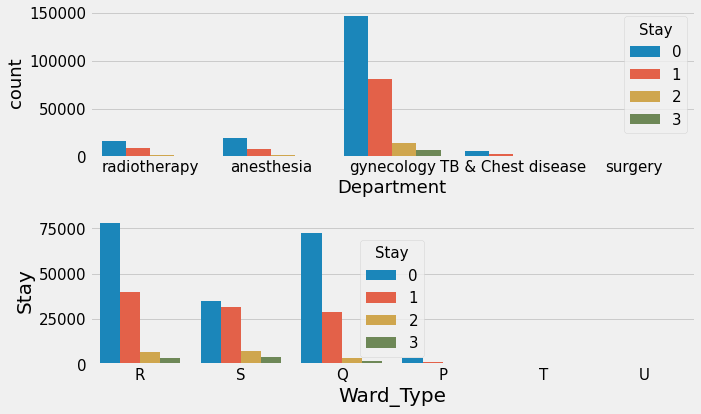

In [27]:
plt.figure(figsize=(20,10))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Department', data = df, hue = df.Stay, ax=ax[0])
plt.xlabel('Department',fontsize=20)
plt.ylabel('Stay',fontsize=20)

sns.countplot(x = 'Ward_Type', data = df, hue = df.Stay, ax=ax[1])
plt.xlabel('Ward_Type',fontsize=20)
plt.ylabel('Stay',fontsize=20)

plt.tight_layout()

<Figure size 1440x720 with 0 Axes>

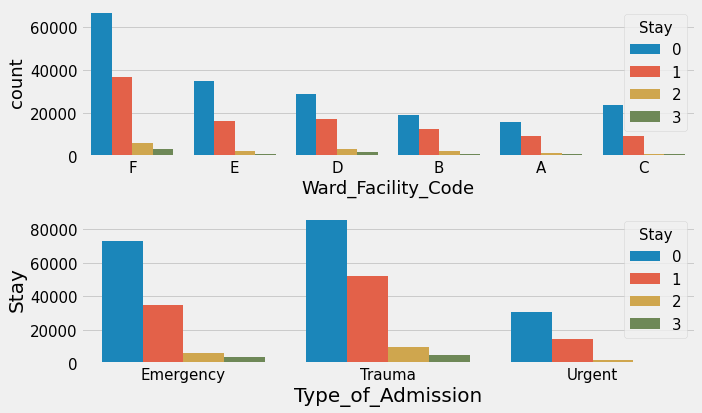

In [28]:
plt.figure(figsize=(20,10))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Ward_Facility_Code', data = df, hue = df.Stay, ax=ax[0])
plt.xlabel('Ward_Facility_Code',fontsize=20)
plt.ylabel('Stay',fontsize=20)

sns.countplot(x = 'Type_of_Admission', data = df, hue = df.Stay, ax=ax[1])
plt.xlabel('Type_of_Admission',fontsize=20)
plt.ylabel('Stay',fontsize=20)

plt.tight_layout()

<Figure size 1440x720 with 0 Axes>

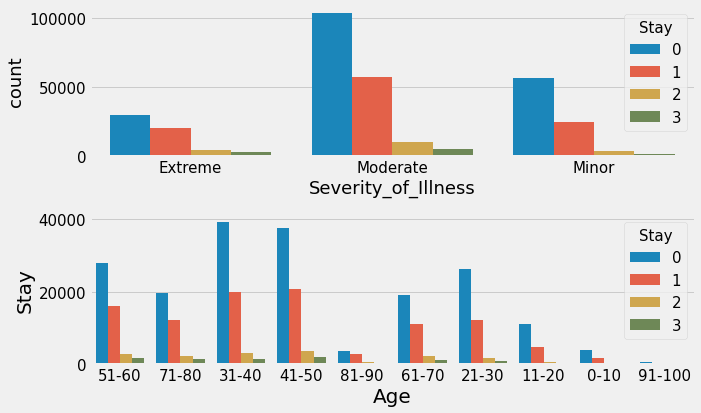

In [29]:
plt.figure(figsize=(20,10))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Severity_of_Illness', data = df, hue = df.Stay, ax=ax[0])
plt.xlabel('Severity_of_Illness',fontsize=20)
plt.ylabel('Stay',fontsize=20)

sns.countplot(x = 'Age', data = df, hue = df.Stay, ax=ax[1])
plt.xlabel('Age',fontsize=20)
plt.ylabel('Stay',fontsize=20)

plt.tight_layout()

* We can see that most of the cases admitted to the Gynecology departments stay for a duration of less than 1 month.

* All Admission type cases, most people stay for less than a month

* We can see that those who are admitted for less than 2 months also, have moderate severity which is not what we expect.

* Majority of the patients admitted for more than 100 days are from the age group 41-50 closely followed by 51-60 and 71-80.

* Age groups 31-40 and 41-50 form the majority of patients admitted for less than 1 month.

* Quite a number of patients in the age group 41-50 also stay upto 2 months in the hospital.

### Analysis of a few Numerical Features which are actually Categorical

[ Hospital_code,

City_Code_Hospital,

Bed_Grade,

City_Code_Patient ]

<Figure size 1584x864 with 0 Axes>

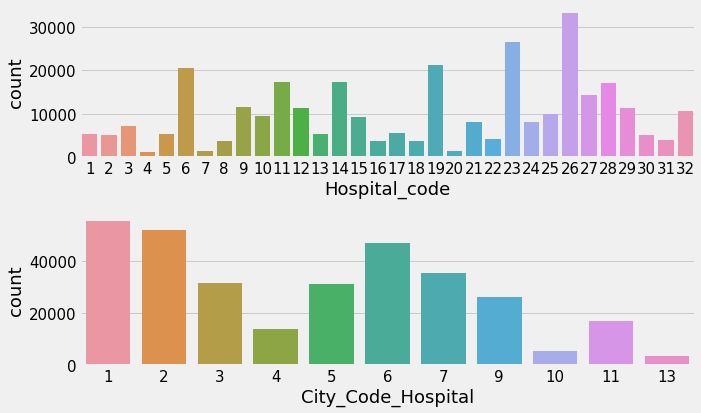

In [30]:
# Univariate Analysis
plt.figure(figsize=(22,12))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Hospital_code', data = df, ax=ax[0])

sns.countplot(x = 'City_Code_Hospital', data = df, ax=ax[1])

plt.tight_layout()

<Figure size 1584x864 with 0 Axes>

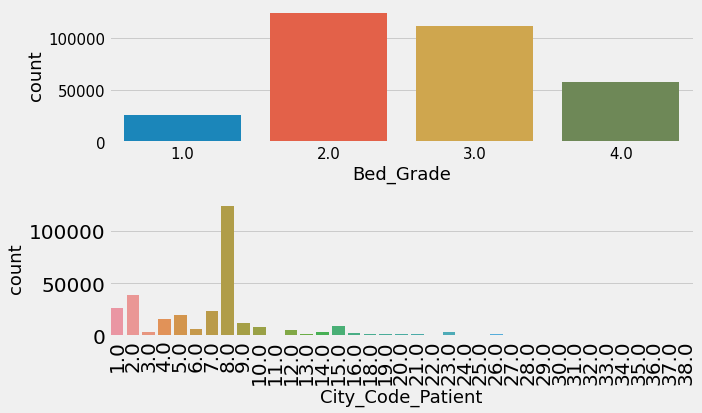

In [31]:
plt.figure(figsize=(22,12))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Bed_Grade', data = df, ax=ax[0])

sns.countplot(x = 'City_Code_Patient', data = df, ax=ax[1])
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.tight_layout()

* We can see that almost 10% of the patients are admitted to the hospital with code 26 followed by hospital with code 23.

* Hospital codes 4,7 and 20 constitute the least number of patients admitted.

* Most of the cases are admitted to Bed Grade 2 and 3 with least number admitted to Bed Grade 1.

<Figure size 1440x720 with 0 Axes>

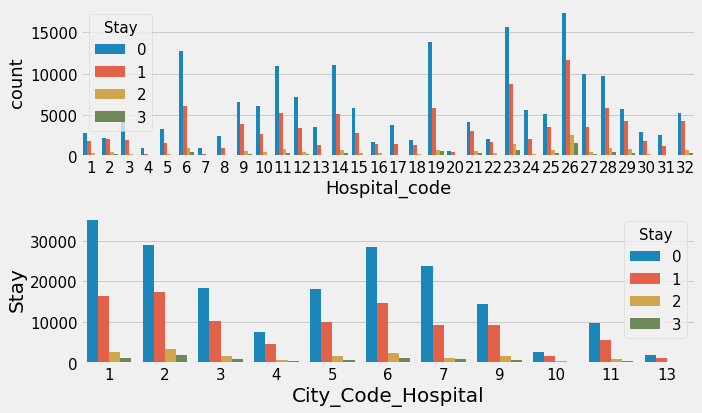

In [32]:
# Bivariate Analysis
plt.figure(figsize=(20,10))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Hospital_code', data = df, hue = df.Stay, ax=ax[0])
plt.xlabel('Hospital_code',fontsize=20)
plt.ylabel('Stay',fontsize=20)

sns.countplot(x = 'City_Code_Hospital', data = df, hue = df.Stay, ax=ax[1])
plt.xlabel('City_Code_Hospital',fontsize=20)
plt.ylabel('Stay',fontsize=20)

plt.tight_layout()

<Figure size 1440x720 with 0 Axes>

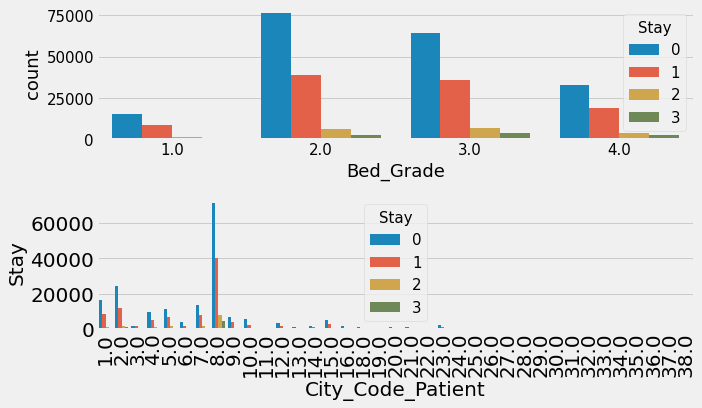

In [33]:
plt.figure(figsize=(20,10))
fig, ax =plt.subplots(2,1)
sns.countplot(x = 'Bed_Grade', data = df, hue = df.Stay, ax=ax[0])
plt.xlabel('Bed_Grade',fontsize=20)
plt.ylabel('Stay',fontsize=20)

sns.countplot(x = 'City_Code_Patient', data = df, hue = df.Stay, ax=ax[1])
plt.xlabel('City_Code_Patient',fontsize=20)
plt.ylabel('Stay',fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.tight_layout()

Most of the case admitted to bed grade 2 and 3, their length of stay in the hospital varies around the 1 month mark.

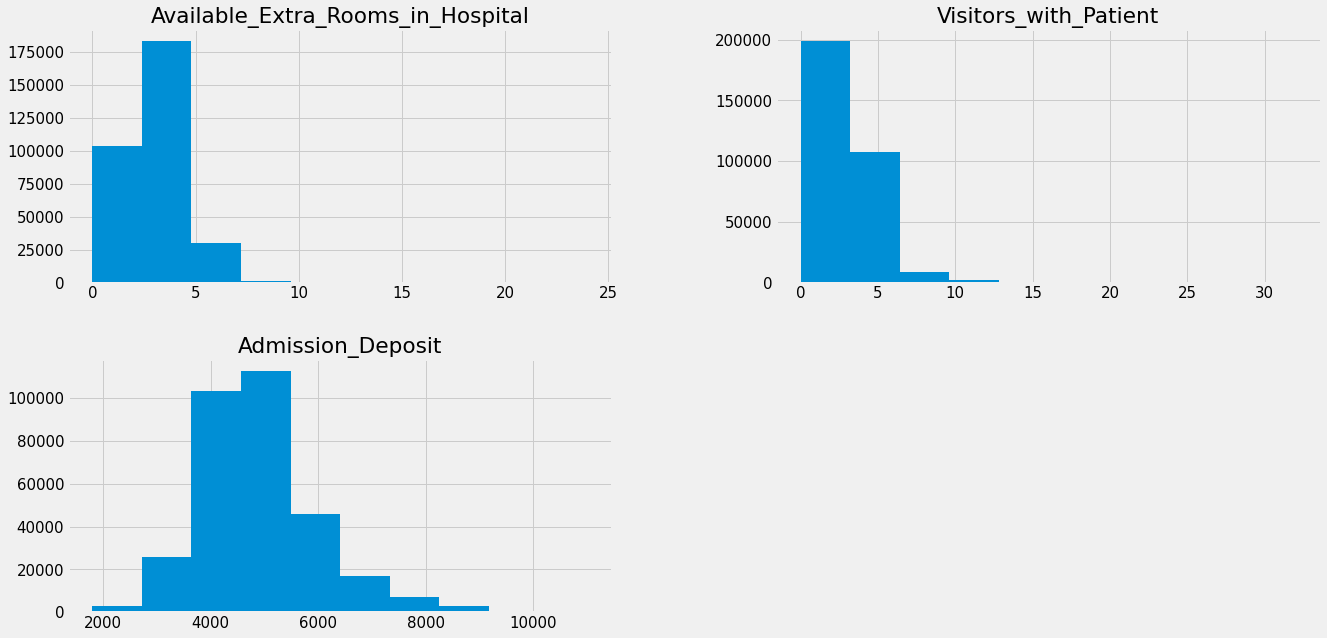

In [34]:
df[['Available_Extra_Rooms_in_Hospital','Visitors_with_Patient', 'Admission_Deposit']].hist(figsize=(20, 10));

### Outliers

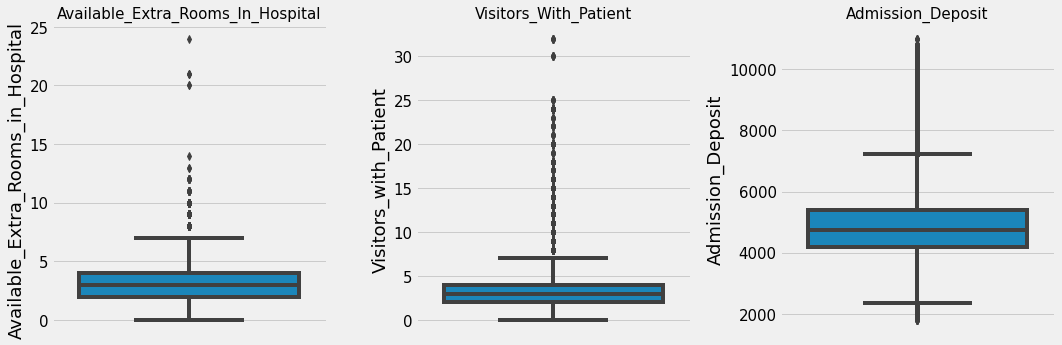

In [35]:
fig, ax= plt.subplots(1,3, figsize=(15, 5))
hist_cols= ['Available_Extra_Rooms_in_Hospital','Visitors_with_Patient', 'Admission_Deposit']

for col, ax in zip(hist_cols, ax.flatten()):
    sns.boxplot(y=col, data=df, ax=ax)
    ax.set_title(col.title(), fontsize=15);

plt.tight_layout()

There are outliers present. 

### Heatmap

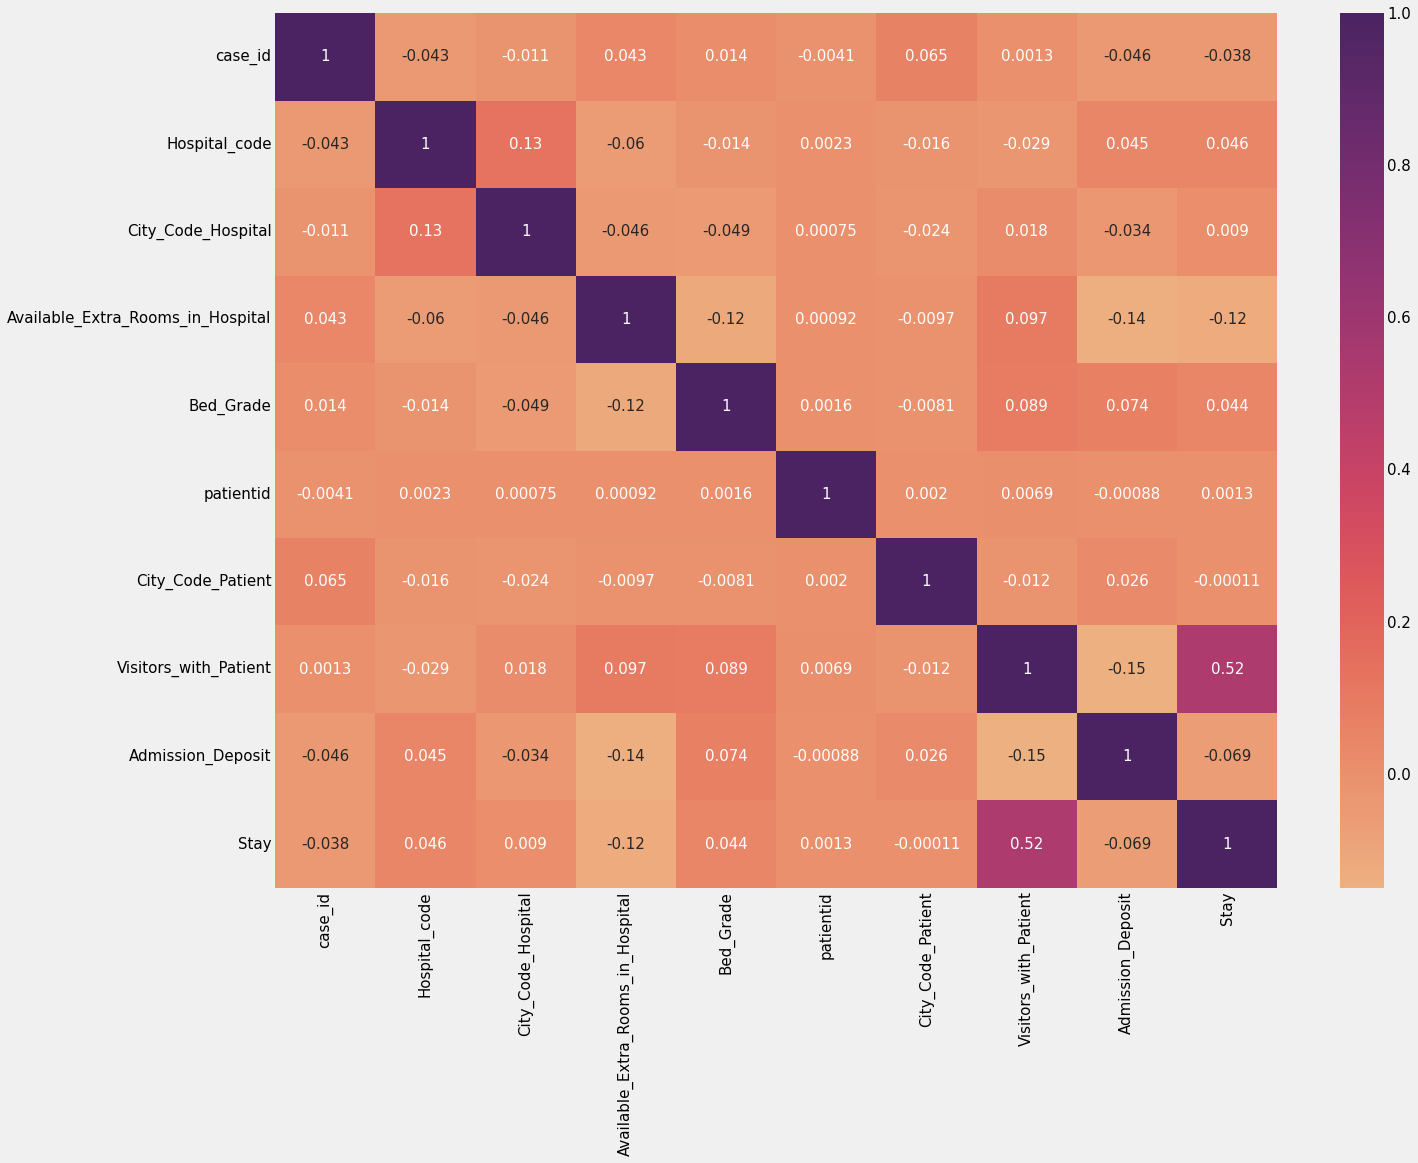

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='flare');

We have keep in mind that the pearson's correlation coefficient is measure of linear relationship between the variables. However, for non-linear, it might not be correct measure to look at the correlation.

As expected, the features have weak linear correlation with each other

### Feature Engineering

#### Dropping Outliers

In [37]:
df.loc[(df.Visitors_with_Patient>25),'Visitors_with_Patient']=np.median(df.Visitors_with_Patient)
df.loc[(df.Available_Extra_Rooms_in_Hospital>15),'Available_Extra_Rooms_in_Hospital']=np.median(df.Available_Extra_Rooms_in_Hospital)

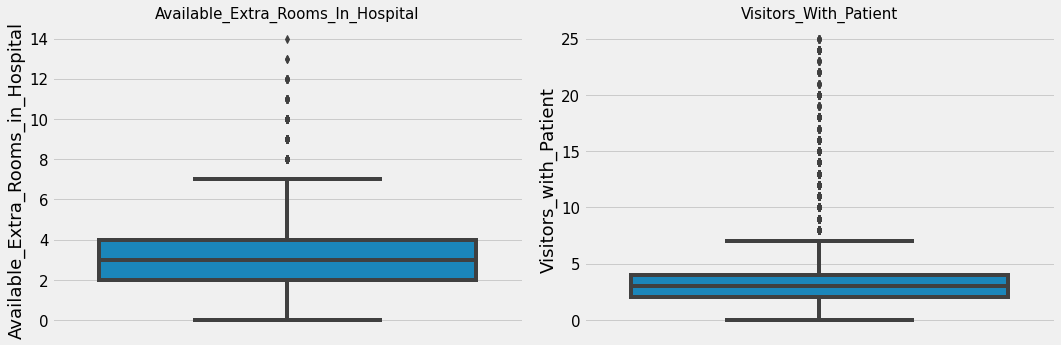

In [38]:
fig, ax= plt.subplots(1,2, figsize=(15, 5))
hist_cols= ['Available_Extra_Rooms_in_Hospital','Visitors_with_Patient']

for col, ax in zip(hist_cols, ax.flatten()):
    sns.boxplot(y=col, data=df, ax=ax)
    ax.set_title(col.title(), fontsize=15);

plt.tight_layout()

In [39]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,1


### Missing Value Imputation

In [40]:
df['Bed_Grade'] = df['Bed_Grade'].fillna(df['Bed_Grade'].mode()[0]) 
df['City_Code_Patient'] = df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0])

In [41]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

### Encoding

### Label Encoding

In [42]:
df = df.replace({"Type_of_Admission" : {"Trauma" : 0,"Urgent" : 1, "Emergency" : 2},
                 "Severity_of_Illness" : {"Minor" : 0, "Moderate" : 1, "Extreme" : 2}})

In [43]:
ohe_fe = [col for col in df.columns if df[col].dtype == 'O']
ohe_fe

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Age']

In [44]:
df = pd.get_dummies(df, columns= ohe_fe)

In [45]:
df.duplicated().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 49 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 4   Bed_Grade                          318438 non-null  float64
 5   patientid                          318438 non-null  int64  
 6   City_Code_Patient                  318438 non-null  float64
 7   Type_of_Admission                  318438 non-null  int64  
 8   Severity_of_Illness                318438 non-null  int64  
 9   Visitors_with_Patient              318438 non-null  int64  
 10  Admission_Deposit                  318438 non-null  int64  
 11  Stay                               3184

In [47]:
df.head()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,1,8,3,3,2.0,31397,7.0,2,2,2,4911,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2,2,5,2,2.0,31397,7.0,0,2,2,5954,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,3,10,1,2,2.0,31397,7.0,0,2,2,4745,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,4,26,2,2,2.0,31397,7.0,0,2,2,7272,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,5,26,2,2,2.0,31397,7.0,0,2,2,5558,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### Train Test Split

In [48]:
X = df.drop(columns=['case_id','patientid','Stay'])
y = df.Stay

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
X_train.shape

(254750, 46)

In [52]:
X_test.shape

(63688, 46)

### Model Creation

### Experimenting With Several Algorithims

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection   import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score,precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

### Logistic Regression

In [68]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg = LogisticRegression()

# Step:3 fitting traing data
log_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_train)

#### EVALUATION

#### TRAINING ACCURACY

In [69]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 72.10991167811581
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84    187465
           1       0.48      0.63      0.55     62991
           2       0.02      0.38      0.03       615
           3       0.30      0.62      0.40      3679

    accuracy                           0.72    254750
   macro avg       0.43      0.59      0.45    254750
weighted avg       0.81      0.72      0.76    254750



#### TESTING ACCURACY

In [70]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regression model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regression model 72.04025876146213
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.76      0.84     46798
           1       0.49      0.63      0.55     15870
           2       0.02      0.40      0.04       165
           3       0.28      0.60      0.38       855

    accuracy                           0.72     63688
   macro avg       0.43      0.59      0.45     63688
weighted avg       0.81      0.72      0.76     63688



### Random Forrest Classifier

In [71]:
# Step:1 importing library and object creation
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100) 

# Step:2 fitting the training data
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
# Step:3 Prediction on training data
rfc_train_predict = rfc.predict(X_train)

# Step:4 Prediction on testing data
rfc_test_predict = rfc.predict(X_test)

#### EVALUATION


#### TRAINING ACCURACY

In [73]:
rfc_train_accuracy = accuracy_score(rfc_train_predict,y_train)
print("Training accuracy RFC classifier:",rfc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(rfc_train_predict,y_train))

Training accuracy RFC classifier: 99.97998037291462
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    151410
           1       1.00      1.00      1.00     81427
           2       1.00      1.00      1.00     14309
           3       1.00      1.00      1.00      7604

    accuracy                           1.00    254750
   macro avg       1.00      1.00      1.00    254750
weighted avg       1.00      1.00      1.00    254750



#### TESTING ACCURACY

In [74]:
rfc_test_accuracy = accuracy_score(rfc_test_predict,y_test)
print("Testing accuracy RFC classifier:",rfc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(rfc_test_predict,y_test))

Testing accuracy RFC classifier: 71.68226353473182
Classification report of training:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83     44107
           1       0.52      0.61      0.56     17633
           2       0.11      0.37      0.17      1036
           3       0.31      0.63      0.42       912

    accuracy                           0.72     63688
   macro avg       0.46      0.59      0.49     63688
weighted avg       0.77      0.72      0.74     63688



### Gradient Boosting Classifier

In [63]:
#Step:1 importing library
from sklearn.ensemble import GradientBoostingClassifier

# Step:2 Object creation 
gbc_reg = GradientBoostingClassifier()

# Step:3 fitting traing data
gbc_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
gbc_test_predict = gbc_reg.predict(X_test)

# Step:5 Prediction on training data
gbc_train_predict = gbc_reg.predict(X_train)

#### EVALUATION


#### TRAINING ACCURACY

In [65]:
gbc_train_accuracy = accuracy_score(gbc_train_predict,y_train)
print("Training accuracy of Gradient Boosting model",gbc_train_accuracy*100)
print("Gradient Boosting training Classification report: \n",classification_report(gbc_train_predict,y_train))

Training accuracy of Gradient Boosting model 73.40726202158979
Gradient Boosting training Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85    190511
           1       0.48      0.67      0.56     57960
           2       0.08      0.42      0.13      2747
           3       0.30      0.65      0.41      3532

    accuracy                           0.73    254750
   macro avg       0.45      0.63      0.49    254750
weighted avg       0.83      0.73      0.77    254750



#### TESTING ACCURACY

In [66]:
gbc_test_accuracy = accuracy_score(gbc_test_predict,y_test)
print("Testing accuracy of Gradient Boosting model",gbc_test_accuracy*100)
print("Gradient Boosting testing Classification report: \n",classification_report(gbc_test_predict,y_test))

Testing accuracy of Gradient Boosting model 73.32464514508229
Gradient Boosting testing Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.76      0.85     47614
           1       0.48      0.67      0.56     14605
           2       0.07      0.40      0.12       645
           3       0.29      0.64      0.40       824

    accuracy                           0.73     63688
   macro avg       0.45      0.62      0.48     63688
weighted avg       0.83      0.73      0.77     63688



### Xgboost Classifier

In [54]:
# Step:1 importing library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

#### EVALUATION


#### TRAINING ACCURACY

In [57]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy XGB classifier:",xgb_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(xgb_train_predict,y_train))

Training accuracy XGB classifier: 74.6838076545633
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85    188114
           1       0.50      0.69      0.58     59105
           2       0.16      0.61      0.25      3731
           3       0.38      0.77      0.51      3800

    accuracy                           0.75    254750
   macro avg       0.50      0.71      0.55    254750
weighted avg       0.83      0.75      0.77    254750



#### TESTING ACCURACY

In [58]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy XGB classifier:",xgb_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(xgb_test_predict,y_test))

Testing accuracy XGB classifier: 73.52876523049868
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85     47055
           1       0.49      0.67      0.56     14874
           2       0.10      0.42      0.16       849
           3       0.31      0.62      0.41       910

    accuracy                           0.74     63688
   macro avg       0.46      0.62      0.50     63688
weighted avg       0.82      0.74      0.77     63688



### Naive bayes

In [81]:
# Step:1 importing library and object creation
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Step:2 fitting the training data
nb.fit(X_train,y_train)

# Step:3 Prediction on training data
nb_train_predict = nb.predict(X_train)

# Step:4 Prediction on testing data
nb_test_predict = nb.predict(X_test)

#### EVALUATION


#### TRAINING ACCURACY

In [82]:
nb_train_accuracy = accuracy_score(nb_train_predict,y_train)
print("Training accuracy Naive bayes classifier:",nb_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(nb_train_predict,y_train))

Training accuracy Naive bayes classifier: 9.61766437684004
Classification report of training:
               precision    recall  f1-score   support

           0       0.07      0.79      0.13     13437
           1       0.00      0.69      0.00        55
           2       0.70      0.05      0.10    184847
           3       0.51      0.07      0.12     56411

    accuracy                           0.10    254750
   macro avg       0.32      0.40      0.09    254750
weighted avg       0.62      0.10      0.11    254750



#### TESTING ACCURACY¶

In [83]:
nb_test_accuracy = accuracy_score(nb_test_predict,y_test)
print("Testing accuracy Naive bayes classifier:",nb_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(nb_test_predict,y_test))

Testing accuracy Naive bayes classifier: 9.621906795628691
Classification report of training:
               precision    recall  f1-score   support

           0       0.07      0.80      0.13      3460
           1       0.00      0.70      0.00        10
           2       0.70      0.05      0.10     46185
           3       0.48      0.06      0.11     14033

    accuracy                           0.10     63688
   macro avg       0.31      0.40      0.09     63688
weighted avg       0.62      0.10      0.10     63688



### LightGBM Classifier

In [84]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.


In [85]:
# Step:1 importing library and object creation
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

# Step:2 fitting the training data
lgbm.fit(X_train,y_train)

# Step:3 Prediction on training data
lgbm_train_predict = lgbm.predict(X_train)

# Step:4 Prediction on testing data
lgbm_test_predict = lgbm.predict(X_test)

#### EVALUATION


#### TRAINING ACCURACY

In [86]:
lgbm_train_accuracy = accuracy_score(lgbm_train_predict,y_train)
print("Training accuracy LightGBM classifier:",lgbm_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(lgbm_train_predict,y_train))

Training accuracy LightGBM classifier: 73.93719332679098
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85    189076
           1       0.49      0.68      0.57     58389
           2       0.12      0.48      0.19      3553
           3       0.34      0.70      0.46      3732

    accuracy                           0.74    254750
   macro avg       0.48      0.66      0.52    254750
weighted avg       0.83      0.74      0.77    254750



#### TESTING ACCURACY

In [87]:
lgbm_test_accuracy = accuracy_score(lgbm_test_predict,y_test)
print("Testing accuracy LightGBM classifier:",lgbm_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(lgbm_test_predict,y_test))

Testing accuracy LightGBM classifier: 73.52876523049868
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85     47245
           1       0.48      0.67      0.56     14696
           2       0.10      0.43      0.17       856
           3       0.30      0.63      0.41       891

    accuracy                           0.74     63688
   macro avg       0.46      0.62      0.50     63688
weighted avg       0.82      0.74      0.77     63688



### Catboost Classifier

In [88]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [89]:
# Step:1 importing library and object creation
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()

# Step:2 fitting the training data
cbc.fit(X_train,y_train)

# Step:3 Prediction on training data
cbc_train_predict = lgbm.predict(X_train)

# Step:4 Prediction on testing data
cbc_test_predict = lgbm.predict(X_test)

Learning rate set to 0.104963
0:	learn: 1.2568450	total: 260ms	remaining: 4m 19s
1:	learn: 1.1616696	total: 346ms	remaining: 2m 52s
2:	learn: 1.0900388	total: 431ms	remaining: 2m 23s
3:	learn: 1.0339333	total: 518ms	remaining: 2m 8s
4:	learn: 0.9874167	total: 603ms	remaining: 2m
5:	learn: 0.9472903	total: 688ms	remaining: 1m 54s
6:	learn: 0.9145912	total: 770ms	remaining: 1m 49s
7:	learn: 0.8866159	total: 855ms	remaining: 1m 45s
8:	learn: 0.8633717	total: 932ms	remaining: 1m 42s
9:	learn: 0.8433852	total: 1.03s	remaining: 1m 41s
10:	learn: 0.8265181	total: 1.13s	remaining: 1m 41s
11:	learn: 0.8109690	total: 1.21s	remaining: 1m 39s
12:	learn: 0.7973897	total: 1.31s	remaining: 1m 39s
13:	learn: 0.7863870	total: 1.4s	remaining: 1m 38s
14:	learn: 0.7759724	total: 1.49s	remaining: 1m 37s
15:	learn: 0.7675594	total: 1.58s	remaining: 1m 37s
16:	learn: 0.7599672	total: 1.67s	remaining: 1m 36s
17:	learn: 0.7529592	total: 1.75s	remaining: 1m 35s
18:	learn: 0.7473541	total: 1.85s	remaining: 1m 35

158:	learn: 0.6745299	total: 13s	remaining: 1m 8s
159:	learn: 0.6743865	total: 13.1s	remaining: 1m 8s
160:	learn: 0.6743333	total: 13.1s	remaining: 1m 8s
161:	learn: 0.6741534	total: 13.2s	remaining: 1m 8s
162:	learn: 0.6740512	total: 13.3s	remaining: 1m 8s
163:	learn: 0.6738977	total: 13.4s	remaining: 1m 8s
164:	learn: 0.6738082	total: 13.5s	remaining: 1m 8s
165:	learn: 0.6737073	total: 13.5s	remaining: 1m 8s
166:	learn: 0.6736175	total: 13.6s	remaining: 1m 7s
167:	learn: 0.6734789	total: 13.7s	remaining: 1m 7s
168:	learn: 0.6734124	total: 13.8s	remaining: 1m 7s
169:	learn: 0.6732730	total: 13.8s	remaining: 1m 7s
170:	learn: 0.6732053	total: 13.9s	remaining: 1m 7s
171:	learn: 0.6731410	total: 14s	remaining: 1m 7s
172:	learn: 0.6730353	total: 14.1s	remaining: 1m 7s
173:	learn: 0.6729184	total: 14.1s	remaining: 1m 7s
174:	learn: 0.6728149	total: 14.2s	remaining: 1m 7s
175:	learn: 0.6726882	total: 14.3s	remaining: 1m 7s
176:	learn: 0.6725730	total: 14.4s	remaining: 1m 6s
177:	learn: 0.67

320:	learn: 0.6621896	total: 25.7s	remaining: 54.3s
321:	learn: 0.6621145	total: 25.7s	remaining: 54.2s
322:	learn: 0.6620114	total: 25.8s	remaining: 54.1s
323:	learn: 0.6619635	total: 25.9s	remaining: 54.1s
324:	learn: 0.6619073	total: 26s	remaining: 54s
325:	learn: 0.6618256	total: 26.1s	remaining: 53.9s
326:	learn: 0.6617874	total: 26.1s	remaining: 53.8s
327:	learn: 0.6617540	total: 26.2s	remaining: 53.7s
328:	learn: 0.6616921	total: 26.3s	remaining: 53.6s
329:	learn: 0.6616461	total: 26.4s	remaining: 53.5s
330:	learn: 0.6615975	total: 26.4s	remaining: 53.4s
331:	learn: 0.6615496	total: 26.5s	remaining: 53.3s
332:	learn: 0.6614592	total: 26.6s	remaining: 53.3s
333:	learn: 0.6613881	total: 26.7s	remaining: 53.2s
334:	learn: 0.6613512	total: 26.7s	remaining: 53.1s
335:	learn: 0.6613115	total: 26.9s	remaining: 53.1s
336:	learn: 0.6612055	total: 26.9s	remaining: 53s
337:	learn: 0.6611765	total: 27s	remaining: 52.9s
338:	learn: 0.6611260	total: 27.1s	remaining: 52.8s
339:	learn: 0.661020

480:	learn: 0.6542408	total: 38.2s	remaining: 41.3s
481:	learn: 0.6542030	total: 38.3s	remaining: 41.2s
482:	learn: 0.6541775	total: 38.4s	remaining: 41.1s
483:	learn: 0.6541385	total: 38.5s	remaining: 41s
484:	learn: 0.6540869	total: 38.5s	remaining: 40.9s
485:	learn: 0.6540639	total: 38.6s	remaining: 40.8s
486:	learn: 0.6540273	total: 38.7s	remaining: 40.8s
487:	learn: 0.6539794	total: 38.8s	remaining: 40.7s
488:	learn: 0.6539349	total: 38.9s	remaining: 40.6s
489:	learn: 0.6538997	total: 38.9s	remaining: 40.5s
490:	learn: 0.6538502	total: 39s	remaining: 40.4s
491:	learn: 0.6537671	total: 39.1s	remaining: 40.4s
492:	learn: 0.6537228	total: 39.2s	remaining: 40.3s
493:	learn: 0.6536891	total: 39.3s	remaining: 40.2s
494:	learn: 0.6536516	total: 39.3s	remaining: 40.1s
495:	learn: 0.6536113	total: 39.4s	remaining: 40s
496:	learn: 0.6535547	total: 39.5s	remaining: 40s
497:	learn: 0.6535331	total: 39.6s	remaining: 39.9s
498:	learn: 0.6534937	total: 39.6s	remaining: 39.8s
499:	learn: 0.653464

641:	learn: 0.6475687	total: 51.5s	remaining: 28.7s
642:	learn: 0.6475349	total: 51.6s	remaining: 28.6s
643:	learn: 0.6475006	total: 51.7s	remaining: 28.6s
644:	learn: 0.6474635	total: 51.7s	remaining: 28.5s
645:	learn: 0.6474179	total: 51.8s	remaining: 28.4s
646:	learn: 0.6473650	total: 51.9s	remaining: 28.3s
647:	learn: 0.6473347	total: 52s	remaining: 28.3s
648:	learn: 0.6472871	total: 52.1s	remaining: 28.2s
649:	learn: 0.6472481	total: 52.2s	remaining: 28.1s
650:	learn: 0.6471972	total: 52.3s	remaining: 28s
651:	learn: 0.6471332	total: 52.4s	remaining: 28s
652:	learn: 0.6470970	total: 52.5s	remaining: 27.9s
653:	learn: 0.6470459	total: 52.5s	remaining: 27.8s
654:	learn: 0.6470025	total: 52.6s	remaining: 27.7s
655:	learn: 0.6469680	total: 52.7s	remaining: 27.6s
656:	learn: 0.6469396	total: 52.8s	remaining: 27.6s
657:	learn: 0.6469039	total: 52.9s	remaining: 27.5s
658:	learn: 0.6468828	total: 52.9s	remaining: 27.4s
659:	learn: 0.6468223	total: 53s	remaining: 27.3s
660:	learn: 0.646749

803:	learn: 0.6414971	total: 1m 5s	remaining: 16s
804:	learn: 0.6414558	total: 1m 5s	remaining: 15.9s
805:	learn: 0.6414169	total: 1m 5s	remaining: 15.8s
806:	learn: 0.6413765	total: 1m 5s	remaining: 15.7s
807:	learn: 0.6413518	total: 1m 5s	remaining: 15.7s
808:	learn: 0.6413247	total: 1m 5s	remaining: 15.6s
809:	learn: 0.6412860	total: 1m 6s	remaining: 15.5s
810:	learn: 0.6412707	total: 1m 6s	remaining: 15.4s
811:	learn: 0.6412464	total: 1m 6s	remaining: 15.3s
812:	learn: 0.6412081	total: 1m 6s	remaining: 15.3s
813:	learn: 0.6411643	total: 1m 6s	remaining: 15.2s
814:	learn: 0.6411161	total: 1m 6s	remaining: 15.1s
815:	learn: 0.6410891	total: 1m 6s	remaining: 15s
816:	learn: 0.6410568	total: 1m 6s	remaining: 14.9s
817:	learn: 0.6409920	total: 1m 6s	remaining: 14.9s
818:	learn: 0.6409508	total: 1m 6s	remaining: 14.8s
819:	learn: 0.6409182	total: 1m 6s	remaining: 14.7s
820:	learn: 0.6408945	total: 1m 7s	remaining: 14.6s
821:	learn: 0.6408686	total: 1m 7s	remaining: 14.5s
822:	learn: 0.64

962:	learn: 0.6363909	total: 1m 19s	remaining: 3.05s
963:	learn: 0.6363666	total: 1m 19s	remaining: 2.96s
964:	learn: 0.6363172	total: 1m 19s	remaining: 2.88s
965:	learn: 0.6362928	total: 1m 19s	remaining: 2.8s
966:	learn: 0.6362630	total: 1m 19s	remaining: 2.72s
967:	learn: 0.6362385	total: 1m 19s	remaining: 2.64s
968:	learn: 0.6361874	total: 1m 19s	remaining: 2.55s
969:	learn: 0.6361322	total: 1m 19s	remaining: 2.47s
970:	learn: 0.6360917	total: 1m 20s	remaining: 2.39s
971:	learn: 0.6360604	total: 1m 20s	remaining: 2.31s
972:	learn: 0.6360312	total: 1m 20s	remaining: 2.23s
973:	learn: 0.6360101	total: 1m 20s	remaining: 2.14s
974:	learn: 0.6359743	total: 1m 20s	remaining: 2.06s
975:	learn: 0.6359498	total: 1m 20s	remaining: 1.98s
976:	learn: 0.6358983	total: 1m 20s	remaining: 1.9s
977:	learn: 0.6358596	total: 1m 20s	remaining: 1.81s
978:	learn: 0.6358355	total: 1m 20s	remaining: 1.73s
979:	learn: 0.6357931	total: 1m 20s	remaining: 1.65s
980:	learn: 0.6357722	total: 1m 20s	remaining: 1

#### EVALUATION


#### TRAINING ACCURACY

In [90]:
cbc_train_accuracy = accuracy_score(cbc_train_predict,y_train)
print("Training accuracy Catboost classifier:",cbc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(cbc_train_predict,y_train))

Training accuracy Catboost classifier: 73.93719332679098
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85    189076
           1       0.49      0.68      0.57     58389
           2       0.12      0.48      0.19      3553
           3       0.34      0.70      0.46      3732

    accuracy                           0.74    254750
   macro avg       0.48      0.66      0.52    254750
weighted avg       0.83      0.74      0.77    254750



#### TESTING ACCURACY

In [91]:
cbc_test_accuracy = accuracy_score(cbc_test_predict,y_test)
print("Testing accuracy LightGBM classifier:",cbc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(cbc_test_predict,y_test))

Testing accuracy LightGBM classifier: 73.52876523049868
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85     47245
           1       0.48      0.67      0.56     14696
           2       0.10      0.43      0.17       856
           3       0.30      0.63      0.41       891

    accuracy                           0.74     63688
   macro avg       0.46      0.62      0.50     63688
weighted avg       0.82      0.74      0.77     63688



### KNN

In [92]:
# Step:1 importing library and object creation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

# Step:2 fitting the training data
knn.fit(X_train,y_train)

# Step:3 Prediction on training data
knn_train_predict = lgbm.predict(X_train)

# Step:4 Prediction on testing data
knn_test_predict = lgbm.predict(X_test)

#### EVALUATION


#### TRAINING ACCURACY

In [93]:
knn_train_accuracy = accuracy_score(cbc_train_predict,y_train)
print("Training accuracy KNN:",knn_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(knn_train_predict,y_train))

Training accuracy KNN: 73.93719332679098
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85    189076
           1       0.49      0.68      0.57     58389
           2       0.12      0.48      0.19      3553
           3       0.34      0.70      0.46      3732

    accuracy                           0.74    254750
   macro avg       0.48      0.66      0.52    254750
weighted avg       0.83      0.74      0.77    254750



#### TESTING ACCURACY

In [94]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy KNN:",knn_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(knn_test_predict,y_test))

Testing accuracy KNN: 73.52876523049868
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85     47245
           1       0.48      0.67      0.56     14696
           2       0.10      0.43      0.17       856
           3       0.30      0.63      0.41       891

    accuracy                           0.74     63688
   macro avg       0.46      0.62      0.50     63688
weighted avg       0.82      0.74      0.77     63688



### Decision Tree

In [95]:
# Step:1 importing library and object creation
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Step:2 fitting the training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

# Step:4 Prediction on testing data
dtc_test_predict = dtc.predict(X_test)

#### EVALUATION


#### TRAINING ACCURACY

In [96]:
dtc_train_accuracy = accuracy_score(dtc_train_predict,y_train)
print("Training accuracy Decision Tree:",dtc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(dtc_train_predict,y_train))

Training accuracy Decision Tree: 99.98312070657506
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    151422
           1       1.00      1.00      1.00     81416
           2       1.00      1.00      1.00     14308
           3       1.00      1.00      1.00      7604

    accuracy                           1.00    254750
   macro avg       1.00      1.00      1.00    254750
weighted avg       1.00      1.00      1.00    254750



#### TESTING ACCURACY

In [97]:
dtc_test_accuracy = accuracy_score(dtc_test_predict,y_test)
print("Testing accuracy Decision Tree:",dtc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(dtc_test_predict,y_test))

Testing accuracy Decision Tree: 61.47468910940837
Classification report of training:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75     37100
           1       0.48      0.47      0.47     20769
           2       0.22      0.21      0.21      3828
           3       0.33      0.31      0.32      1991

    accuracy                           0.61     63688
   macro avg       0.44      0.43      0.44     63688
weighted avg       0.61      0.61      0.61     63688



### ANN [MLP Classifier]

In [98]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=100,
                      random_state=42)

# Step:2 Fitting the training data
model.fit(X_train,y_train)

# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

# Step:4 Prediction on test data
mlp_test_predict = model.predict(X_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(X_train)

#### EVALUATION


#### TRAINING ACCURACY

In [99]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 73.64789008832189
Classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85    186266
           1       0.51      0.66      0.57     63207
           2       0.01      0.41      0.02       418
           3       0.37      0.57      0.45      4859

    accuracy                           0.74    254750
   macro avg       0.46      0.60      0.47    254750
weighted avg       0.82      0.74      0.77    254750



#### TESTING ACCURACY

In [100]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 73.23985680190931
Classification report of testing:
               precision    recall  f1-score   support

           0       0.94      0.77      0.84     46575
           1       0.50      0.65      0.57     15868
           2       0.01      0.38      0.02       106
           3       0.34      0.55      0.42      1139

    accuracy                           0.73     63688
   macro avg       0.45      0.58      0.46     63688
weighted avg       0.82      0.73      0.77     63688



### ExtraTreesClassifier

In [101]:
# Step:1 importing library and object creation
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
etf = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Step:2 fitting the training data
etf.fit(X_train,y_train)

# Step:3 Prediction on training data
etf_train_predict = etf.predict(X_train)

# Step:4 Prediction on testing data
etf_test_predict = etf.predict(X_test)

#### EVALUATION


#### TRAINING ACCURACY

In [102]:
etf_train_accuracy = accuracy_score(etf_train_predict,y_train)
print("Training accuracy RFC classifier:",etf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(etf_train_predict,y_train))

Training accuracy RFC classifier: 99.98312070657506
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    151422
           1       1.00      1.00      1.00     81416
           2       1.00      1.00      1.00     14308
           3       1.00      1.00      1.00      7604

    accuracy                           1.00    254750
   macro avg       1.00      1.00      1.00    254750
weighted avg       1.00      1.00      1.00    254750



#### TESTING ACCURACY

In [103]:
etf_test_accuracy = accuracy_score(etf_test_predict,y_test)
print("Testing accuracy XGB classifier:",etf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(etf_test_predict,y_test))

Testing accuracy XGB classifier: 63.29763848762718
Classification report of training:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76     42867
           1       0.43      0.48      0.46     18388
           2       0.12      0.28      0.17      1556
           3       0.24      0.50      0.32       877

    accuracy                           0.63     63688
   macro avg       0.40      0.49      0.43     63688
weighted avg       0.67      0.63      0.65     63688



### Support Vector Classifier

In [104]:
# Step:1 importing library and object creation
from sklearn.svm import SVC

svc_model = SVC() 

# Step:2 fitting the training data
svc_model.fit(X_train,y_train)

# Step:3 Prediction on training data
svc_model_train_predict = svc_model.predict(X_train)

# Step:4 Prediction on testing data
svc_model_test_predict = svc_model.predict(X_test)

#### EVALUATION


#### TRAINING ACCURACY

In [106]:
svc_model_train_accuracy = accuracy_score(svc_model_train_predict,y_train)
print("Training accuracy RFC classifier:",svc_model_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(svc_model_train_predict,y_train))

Training accuracy RFC classifier: 72.51069676153091
Classification report of training:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84    195346
           1       0.45      0.65      0.53     56540
           2       0.02      0.68      0.03       324
           3       0.26      0.77      0.39      2540

    accuracy                           0.73    254750
   macro avg       0.42      0.71      0.45    254750
weighted avg       0.84      0.73      0.77    254750



#### TESTING ACCURACY

In [107]:
svc_model_test_accuracy = accuracy_score(svc_model_test_predict,y_test)
print("Testing accuracy RFC classifier:",svc_model_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(svc_model_test_predict,y_test))

Testing accuracy RFC classifier: 72.15330988569275
Classification report of training:
               precision    recall  f1-score   support

           0       0.96      0.74      0.84     48897
           1       0.45      0.65      0.53     14141
           2       0.01      0.44      0.01        59
           3       0.23      0.71      0.35       591

    accuracy                           0.72     63688
   macro avg       0.41      0.64      0.43     63688
weighted avg       0.84      0.72      0.76     63688



### Hyper-parameter Tuning

Since the dataset is considerably large, it will take a many hours of time to find best parameters using GridSearchCV because it performs an exhaustive search over specified parameter values for an estimator. Insead we will use RandomizedSearchCV. Instead of exhaustively searching over all possible combinations of hyperparameters, RandomizedSearchCV samples a random subset of combinations, making it a more computationally efficient alternative to GridSearchCV.

### Gradient Boosting

In [ ]:
# parameter grid
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(1, 10),
    'learning_rate': np.logspace(-3, -1, 5),
    'subsample': np.linspace(0.1, 1, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'loss': ['deviance', 'exponential']
}

# Initialize the gradient boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Initialize the randomized search
n_iter = 25
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=n_iter, cv=3, verbose=2, scoring='accuracy', random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found during the search
print("Best hyperparameters: ", random_search.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800, subsample=0.1; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800, subsample=0.1; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800, subsample=0.1; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=9, n_estimators=600, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=9, n_estimators=600, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=None, min_sa

[CV] END learning_rate=0.01, loss=exponential, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.03162277660168379, loss=exponential, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=200, subsample=0.2; total time=   0.0s
[CV] END learning_rate=0.03162277660168379, loss=exponential, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=200, subsample=0.2; total time=   0.0s
[CV] END learning_rate=0.03162277660168379, loss=exponential, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=200, subsample=0.2; total time=   0.0s
[CV] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=log2, min_samples_le

In [68]:
best_params_gbc= random_search.best_params_

gbc_final = GradientBoostingClassifier(**best_params_gbc)
gbc_final.fit(X_train, y_train)
y_pred_gbc_final= gbc_final.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred_gbc_final))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85     37853
           1       0.67      0.49      0.57     20466
           2       0.45      0.10      0.16      3526
           3       0.62      0.32      0.42      1843

    accuracy                           0.74     63688
   macro avg       0.63      0.46      0.50     63688
weighted avg       0.71      0.74      0.71     63688



After finding the best parameters using the RandomizedSearchCV, the accuracy of the model has increased marginally in decimals.

### XGBoost

In [59]:
param_grid = {
    'learning_rate': np.logspace(-3, -1, 5), 
    'n_estimator': np.arange(150, 1000, 100),
    'max_depth' : np.arange(1,15),
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'subsample': np.linspace(0.1, 1, 10)
}

xgb_final = XGBClassifier(random_state=42)

random_search_xgb = RandomizedSearchCV(xgb_final, param_grid, n_iter= 25, cv=3, scoring="accuracy", verbose=2, n_jobs=-1, random_state=42)

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_

print("best parameters are: ", best_params_xgb)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[14:03:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


best parameters are:  {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimator': 750, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1}


In [60]:
#original best params
best_params_xgb={'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 1.0, 'n_estimator': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}

In [61]:
xgb_final = XGBClassifier(**best_params_xgb)
xgb_final.fit(X_train, y_train)

[14:06:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimator=100,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [62]:
y_pred_xgb_final= xgb_final.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred_xgb_final))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85     37853
           1       0.67      0.48      0.56     20466
           2       0.41      0.07      0.13      3526
           3       0.64      0.29      0.40      1843

    accuracy                           0.73     63688
   macro avg       0.62      0.45      0.48     63688
weighted avg       0.71      0.73      0.70     63688



### Conclusion

It would have been more useful if there was more information in the data provided. Also a clearer decription of certain feature would have become handy in understanding the data more and maybe even create new features from it. In the model building phase SMOTE techniques haven't been shown as here as it resulted in poor performances.

I have also done the models having all 11 target classes and have got an accuracy of 44%(Even though accuracy isn't my main criteria). I had also done for 5 classes considering 0-10 days as minimal stay and got an accuracy of 65% and I settled for 4 classes as the above models show, where accuracy was 73%. The way you label the target variable will depend on the buisness reqirements and the domain expert inputs.

With this we have finished our project. An in-depth EDA and Feature Engineering has been presented here. Also a lot of iteration through different models and also hypertuning of those models is done. Our model has achieved a decent ROC AUC score indicating that our errors are minimal which bodes well for real time applications. 